<a href="https://www.kaggle.com/code/sparshjain8287/fashion-product-classification-using-resnet50?scriptVersionId=126097042" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.image as mpimg
import plotly.offline as pyo
pyo.init_notebook_mode()
import os
import PIL
import PIL.Image
import pathlib
import cv2

In [26]:
data=pd.read_csv('/kaggle/input/fashion-product-images-dataset/fashion-dataset/images.csv')
data

filename                                               link
0      15970.jpg  http://assets.myntassets.com/v1/images/style/p...
1      39386.jpg  http://assets.myntassets.com/v1/images/style/p...
2      59263.jpg  http://assets.myntassets.com/v1/images/style/p...
3      21379.jpg  http://assets.myntassets.com/v1/images/style/p...
4      53759.jpg  http://assets.myntassets.com/v1/images/style/p...
...          ...                                                ...
44441  17036.jpg  http://assets.myntassets.com/v1/images/style/p...
44442   6461.jpg  http://assets.myntassets.com/v1/images/style/p...
44443  18842.jpg  http://assets.myntassets.com/v1/images/style/p...
44444  46694.jpg  http://assets.myntassets.com/v1/images/style/p...
44445  51623.jpg  http://assets.myntassets.com/assets/images/516...

[44446 rows x 2 columns]

In [27]:
styles_df=pd.read_csv('/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv',on_bad_lines='skip')

In [28]:
DATASET_PATH = '/kaggle/input/fashion-product-images-dataset/fashion-dataset/fashion-dataset'

print(os.listdir(DATASET_PATH))

['images.csv', 'images', 'styles.csv', 'styles']


In [29]:
styles_df.shape

(44424, 10)

In [30]:
images_df=pd.read_csv('/kaggle/input/fashion-product-images-dataset/fashion-dataset/images.csv')
images_df.shape

(44446, 2)

In [31]:
styles_df.head(10)

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   
5   1855    Men        Apparel     Topwear      Tshirts       Grey  Summer   
6  30805    Men        Apparel     Topwear       Shirts      Green  Summer   
7  26960  Women        Apparel     Topwear       Shirts     Purple  Summer   
8  29114    Men    Accessories       Socks        Socks  Navy Blue  Summer   
9  30039    Men    Accessories     Watches      Watches      Black  Winter   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  
5  2011.0  Casual           Inkfruit Mens Chain Reaction T-shirt  
6  2012.0  Ethnic               Fabindia Men Striped Green Shirt  
7  2012.0  Casual                  Jealous 21 Women Purple Shirt  
8  2012.0  Casual                       Puma Men Pack of 3 Socks  
9  2016.0  Casual                         Skagen Men Black Watch

In [32]:
images_df.head(10)

filename                                               link
0  15970.jpg  http://assets.myntassets.com/v1/images/style/p...
1  39386.jpg  http://assets.myntassets.com/v1/images/style/p...
2  59263.jpg  http://assets.myntassets.com/v1/images/style/p...
3  21379.jpg  http://assets.myntassets.com/v1/images/style/p...
4  53759.jpg  http://assets.myntassets.com/v1/images/style/p...
5   1855.jpg  http://assets.myntassets.com/v1/images/style/p...
6  30805.jpg  http://assets.myntassets.com/v1/images/style/p...
7  26960.jpg  http://assets.myntassets.com/v1/images/style/p...
8  29114.jpg  http://assets.myntassets.com/v1/images/style/p...
9  30039.jpg  http://assets.myntassets.com/v1/images/style/p...

## Gender Distribution 

In [33]:
print(styles_df.gender.unique())

['Men' 'Women' 'Boys' 'Girls' 'Unisex']


In [34]:
print(styles_df.gender.value_counts())

Men       22147
Women     18631
Unisex     2161
Boys        830
Girls       655
Name: gender, dtype: int64


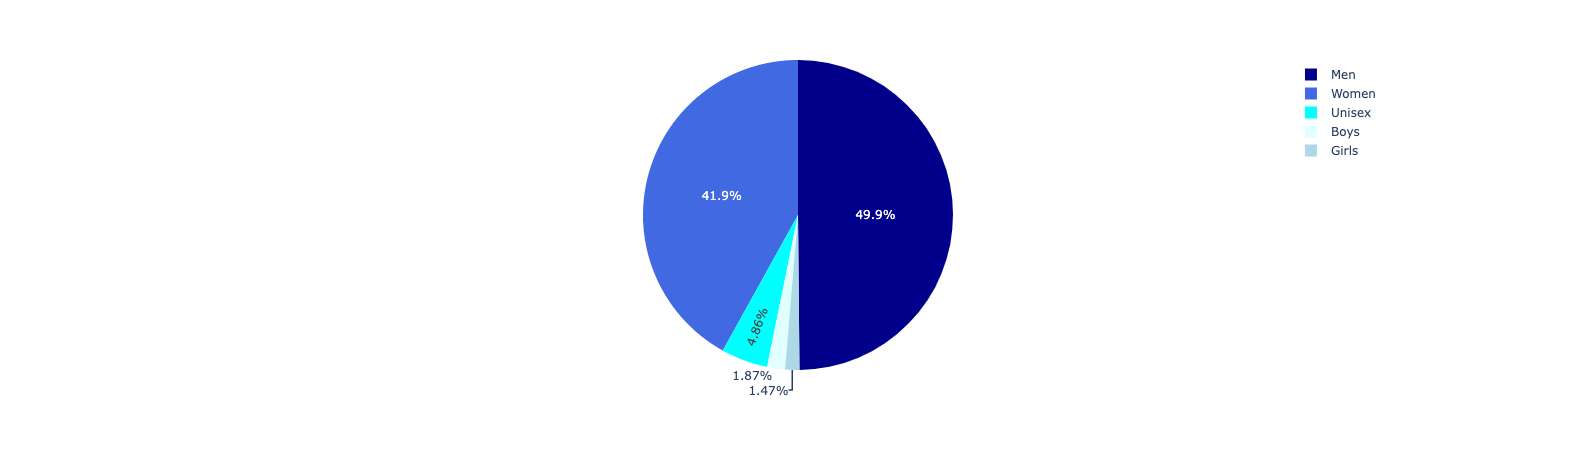

In [35]:
fig = px.pie(styles_df, styles_df['gender'],color='gender',color_discrete_map={'Men':'darkblue',
                                 'Women':'royalblue',
                                 'Unisex':'cyan',
                                 'Boys':'lightcyan',
                                 'Girls':'lightblue'})
fig.show()

We have huge dataset of Men category(22147 samples), women category(18631 samples),Unisex category(2161 samples),Boys category(830 samples) and girls category(655 samples).

## Master Category Distribution

In [36]:
macount = pd.value_counts(styles_df['masterCategory'])
macount

Apparel           21397
Accessories       11274
Footwear           9219
Personal Care      2403
Free Items          105
Sporting Goods       25
Home                  1
Name: masterCategory, dtype: int64

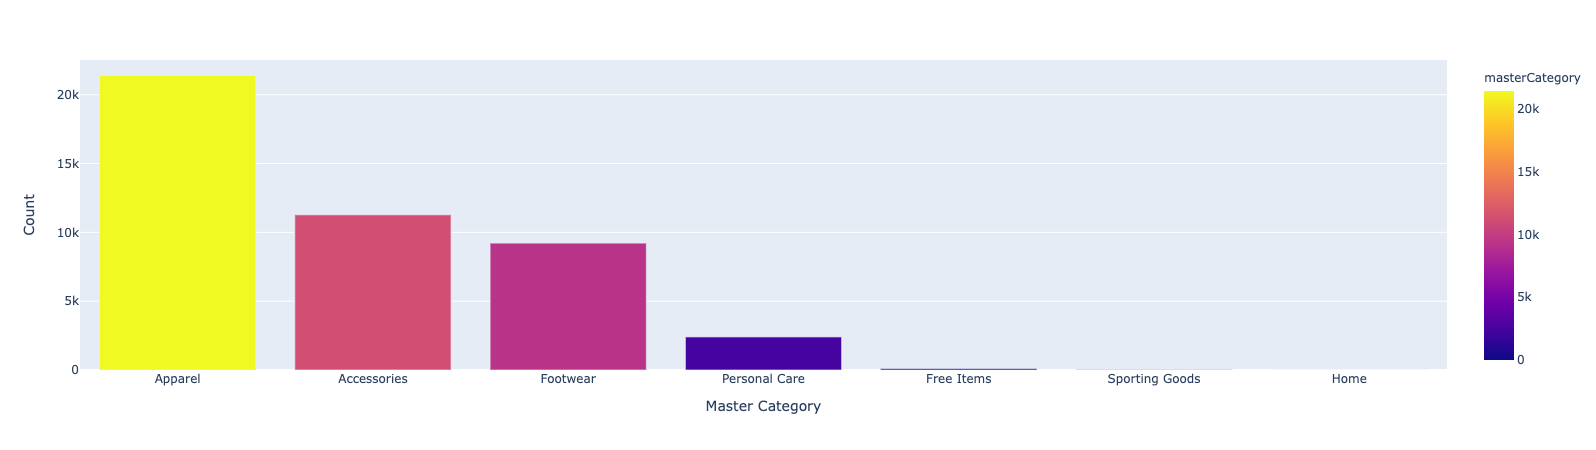

In [37]:
fig = px.bar(macount, x=macount.index, y=macount.values,color='masterCategory',labels={'index':'Master Category',
                                                                              'y':'Count'})
fig.show()

We have huge apparel and accessories master distribution.

## Subcategory Distribution

In [38]:
subcount=pd.value_counts(styles_df['subCategory'])
subcount

Topwear                     15402
Shoes                        7343
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1079
Eyewear                      1073
Fragrance                    1011
Sandal                        963
Wallets                       933
Flip Flops                    913
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree                         427
Nails                         329
Makeup                        307
Headwear                      293
Ties                          258
Accessories                   129
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Free Gifts                    104
Stoles                         90
Skin Care                      77
Skin          

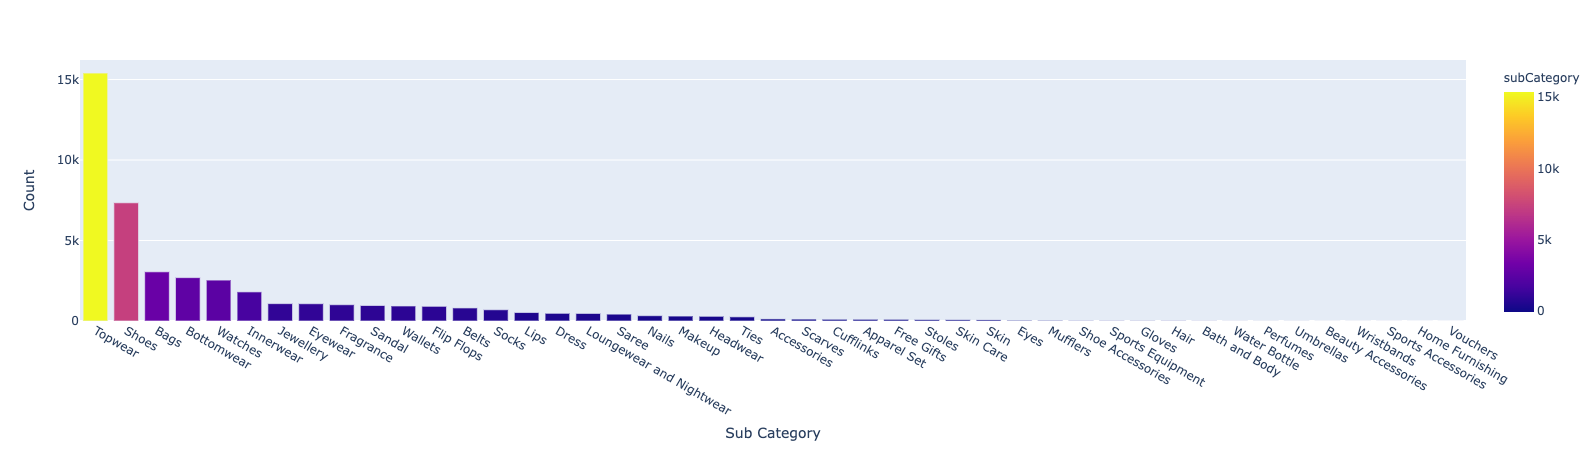

In [39]:
fig = px.bar(subcount, x=subcount.index, y=subcount.values,color='subCategory',labels={'index':'Sub Category',
                                                                              'y':'Count'})
fig.show()

We have huge category of topwear, shoes, bags etc

## Article Type Distribution

In [40]:
arcount=pd.value_counts(styles_df['articleType'])
arcount

Tshirts                7067
Shirts                 3217
Casual Shoes           2845
Watches                2542
Sports Shoes           2036
                       ... 
Shoe Laces                1
Mens Grooming Kit         1
Body Wash and Scrub       1
Suits                     1
Ipad                      1
Name: articleType, Length: 143, dtype: int64

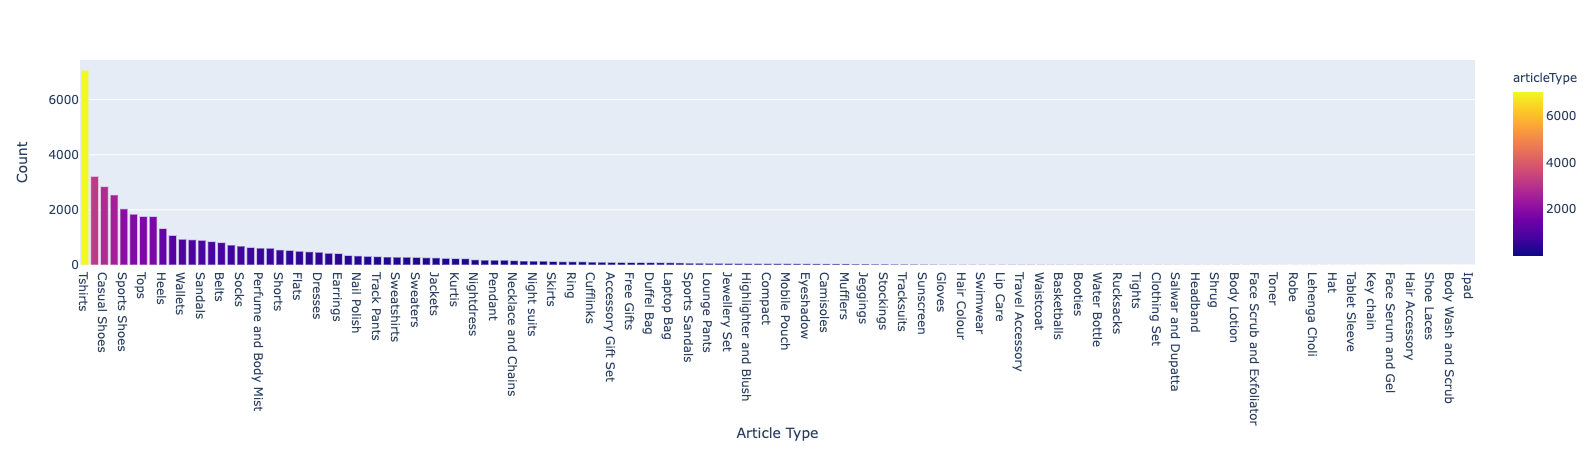

In [41]:
fig = px.bar(arcount, x=arcount.index, y=arcount.values,color='articleType',labels={'index':'Article Type',
                                                                              'y':'Count'})
fig.show()

We have huge category of Tshirts, Watches etc

## Base Colour Distribution 


In [42]:
basecount=pd.value_counts(styles_df['baseColour'])
basecount

Black                9728
White                5538
Blue                 4918
Brown                3494
Grey                 2741
Red                  2455
Green                2115
Pink                 1860
Navy Blue            1789
Purple               1640
Silver               1090
Yellow                778
Beige                 749
Gold                  628
Maroon                581
Orange                530
Olive                 410
Multi                 394
Cream                 390
Steel                 315
Charcoal              228
Peach                 195
Off White             182
Skin                  179
Lavender              162
Grey Melange          146
Khaki                 139
Magenta               129
Teal                  120
Tan                   114
Mustard                97
Bronze                 95
Copper                 86
Turquoise Blue         69
Rust                   66
Burgundy               45
Metallic               43
Coffee Brown           31
Mauve       

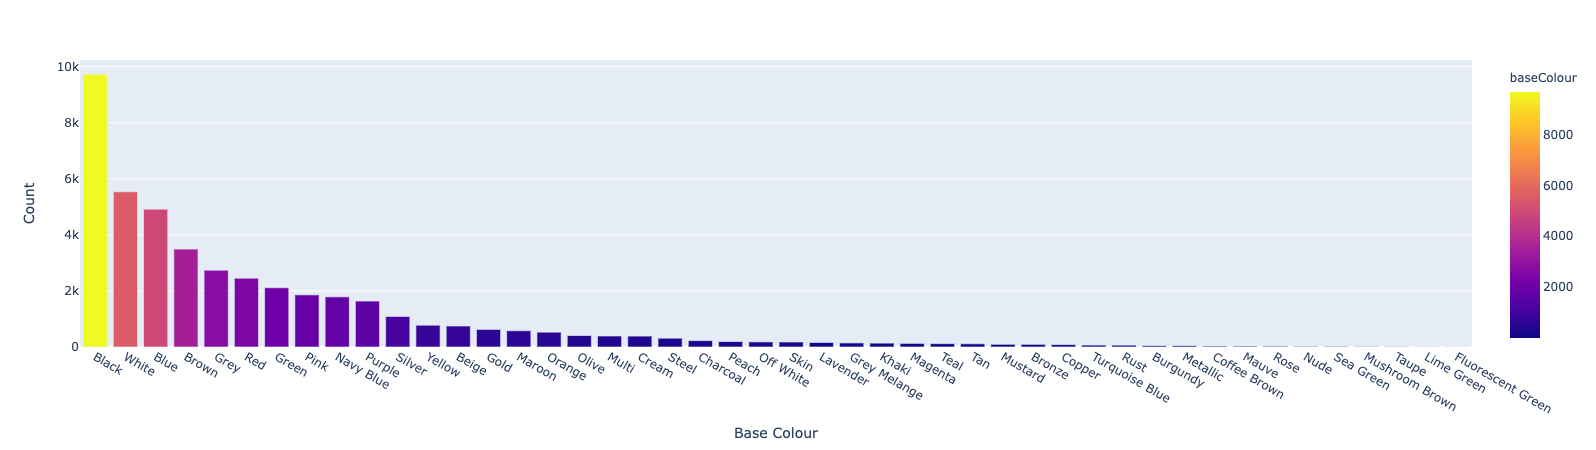

In [43]:
fig = px.bar(basecount, x=basecount.index, y=basecount.values,color='baseColour',labels={'index':'Base Colour',
                                                                              'y':'Count'})
fig.show()

We have huge category of black, white, blue etc

## Season Distribution

In [44]:
secount=pd.value_counts(styles_df['season'])
secount

Summer    21472
Fall      11431
Winter     8517
Spring     2983
Name: season, dtype: int64

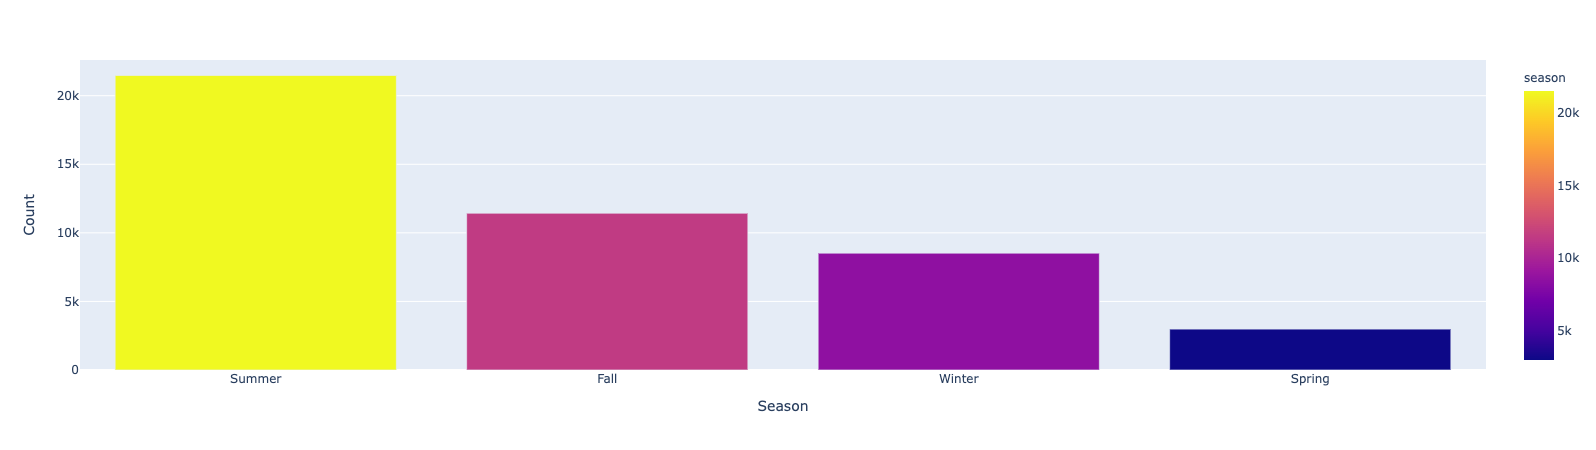

In [45]:
fig = px.bar(secount, x=secount.index, y=secount.values,color='season',labels={'index':'Season',
                                                                              'y':'Count'})
fig.show()



We have huge category of summer, fall, winter etc

## Usage Distribution

In [46]:
uscount=pd.value_counts(styles_df['usage'])
uscount

Casual          34406
Sports           4025
Ethnic           3208
Formal           2345
Smart Casual       67
Party              29
Travel             26
Home                1
Name: usage, dtype: int64

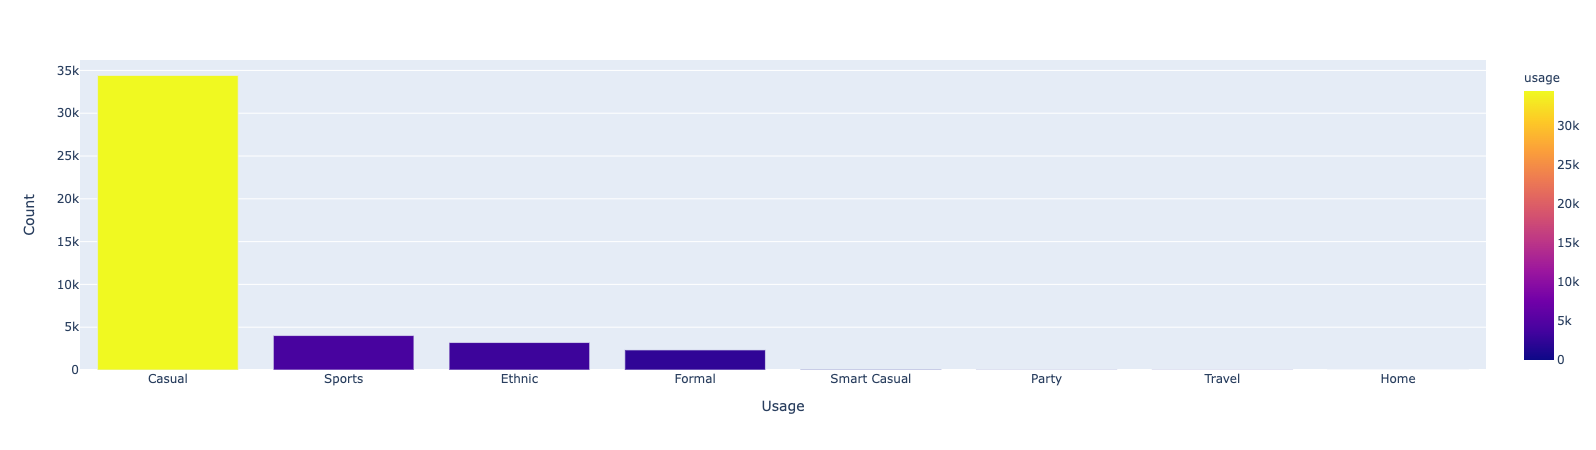

In [47]:
fig = px.bar(uscount, x=uscount.index, y=uscount.values,color='usage',labels={'index':'Usage',
                                                                              'y':'Count'})
fig.show()

We have huge category of casual,sports etc

## Image Data

In [48]:
data_dir = pathlib.Path(DATASET_PATH)

images = list(data_dir.glob('*/*.jpg'))

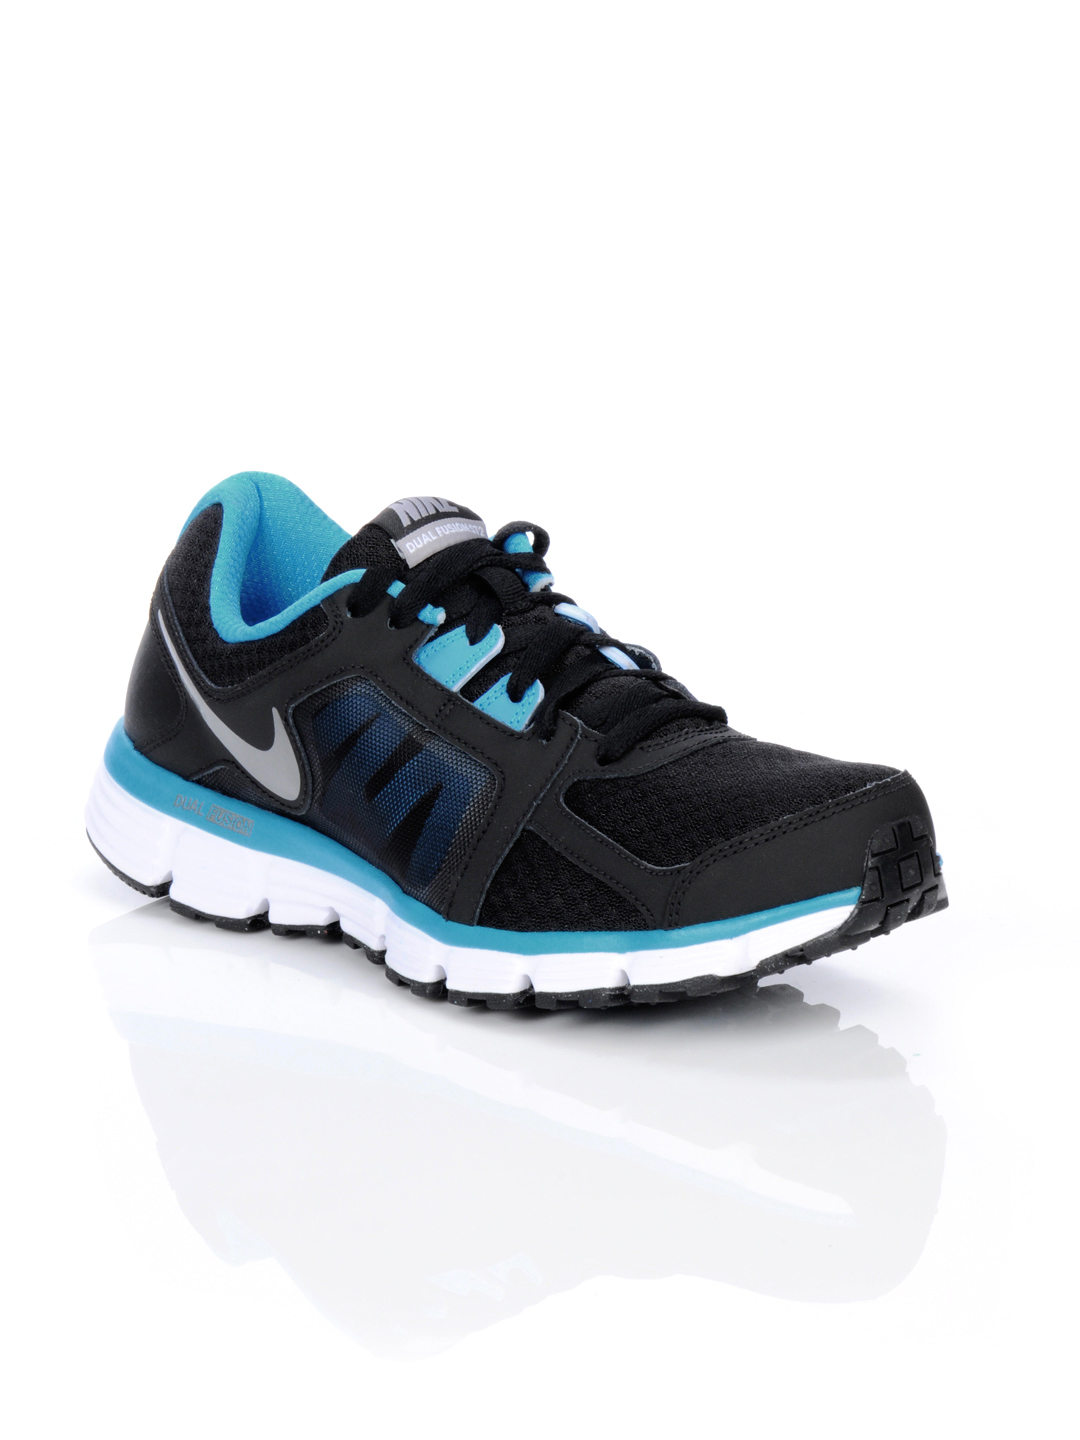

In [49]:
PIL.Image.open(str(images[0]))

In [50]:
styles_df['image'] = styles_df.apply(lambda row: os.path.join(DATASET_PATH, 'images', str(row['id']) + ".jpg"), axis=1)
styles_df.head()

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  \
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt   
1  2012.0  Casual             Peter England Men Party Blue Jeans   
2  2016.0  Casual                       Titan Women Silver Watch   
3  2011.0  Casual  Manchester United Men Solid Black Track Pants   
4  2012.0  Casual                          Puma Men Grey T-shirt   

                                               image  
0  /kaggle/input/fashion-product-images-dataset/f...  
1  /kaggle/input/fashion-product-images-dataset/f...  
2  /kaggle/input/fashion-product-images-dataset/f...  
3  /kaggle/input/fashion-product-images-dataset/f...  
4  /kaggle/input/fashion-product-images-dataset/f...

In [51]:
def load_image(img_path, resized_fac = 0.1):
    img_object = plt.imread(img_path)
    w, h, c = img_object.shape
    resized = cv2.resize(img_object, (int(h*resized_fac), int(w*resized_fac)))
    return resized

In [52]:
def plot_grid(image_list, group):
    fig = plt.figure(figsize=(40, 10),facecolor="#D7DBDD")
    plt.suptitle(group, fontsize=40)
    
    samples = len(image_list)
    
    for i in range(samples):
        ax = plt.subplot(1, 4, i + 1)
        plt.imshow(load_image(image_list[i][0]))
        plt.title(image_list[i][1], fontsize=8)
        plt.axis("off")
    plt.show()  

In [53]:
def plot_grouped_images(dataframe, column, samples=4):
    groups = dataframe[column].unique()
    grouped_dataframe = dataframe.groupby(column)
    
    for group in groups:
        
        try:
            image_list = grouped_dataframe.get_group(group).sample(samples)[['image', 'productDisplayName']].values
            plot_grid(image_list, group)
        except:
            image_list = grouped_dataframe.get_group(group).sample(1)[['image', 'productDisplayName']].values
            plot_grid(image_list, group) 

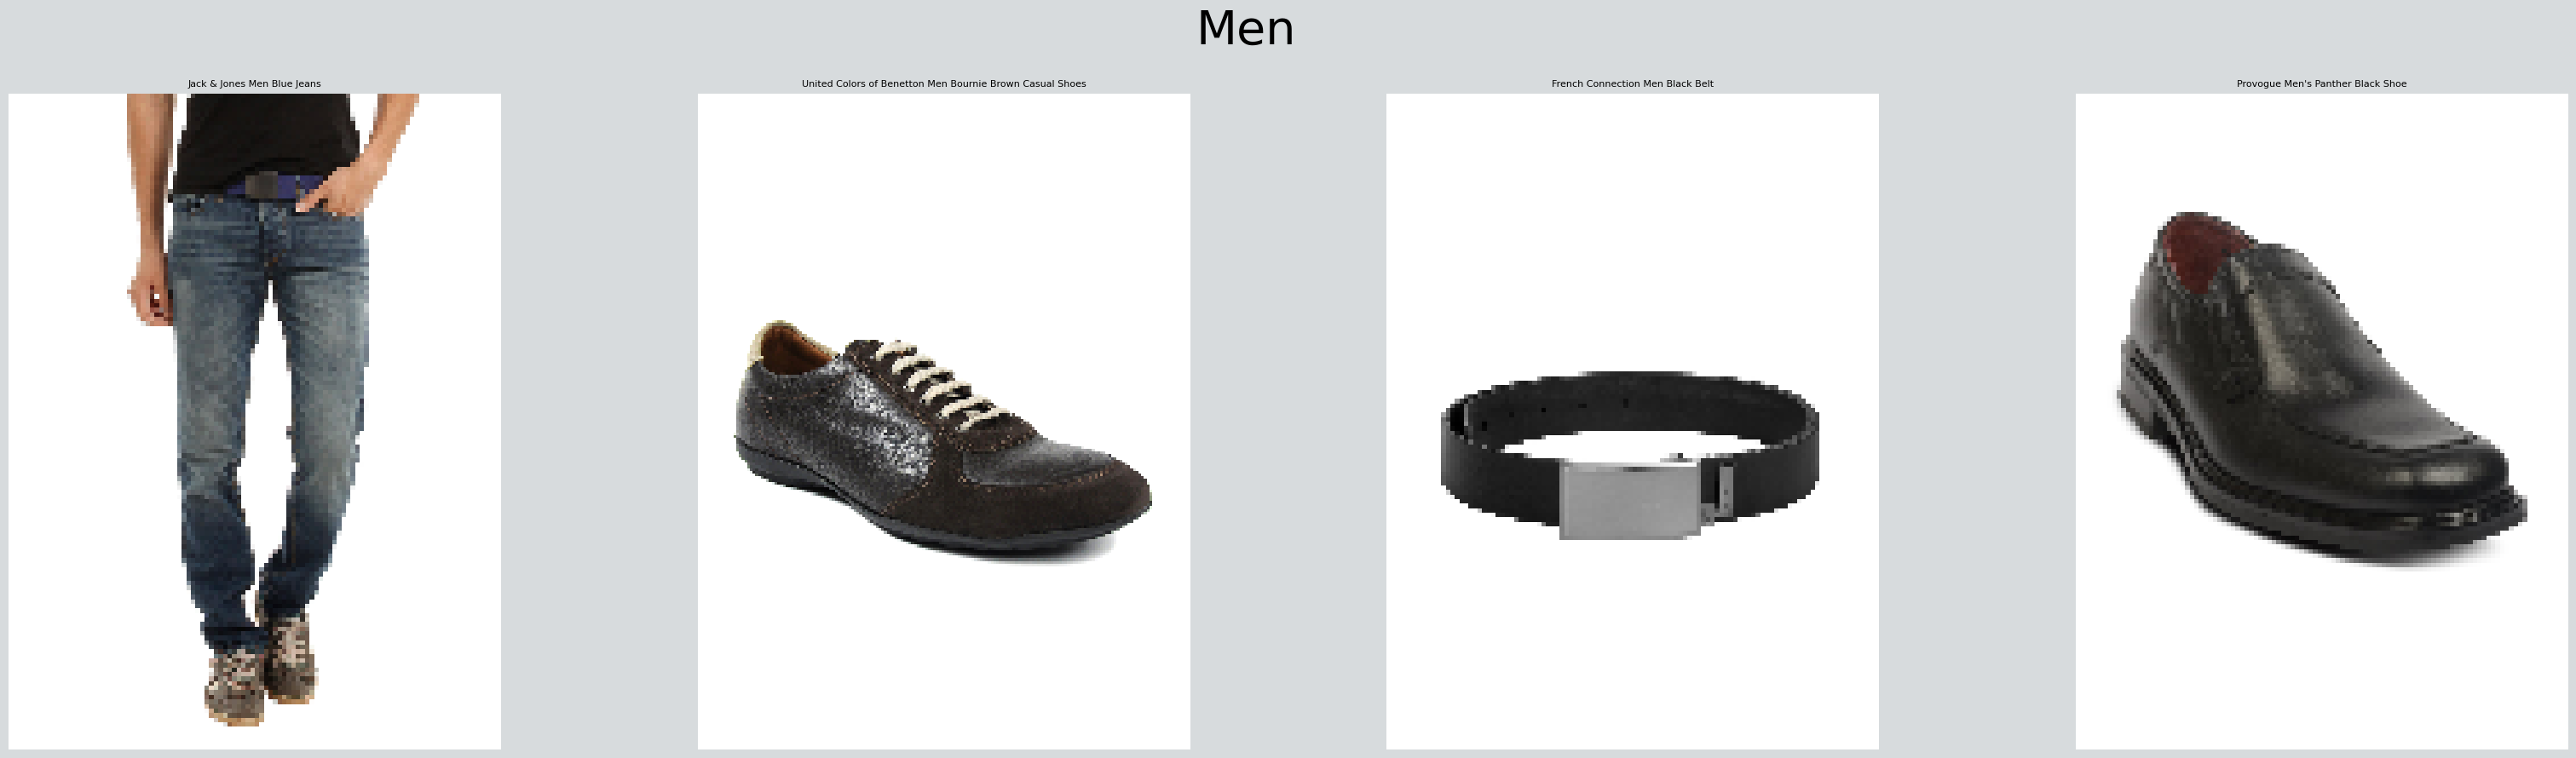

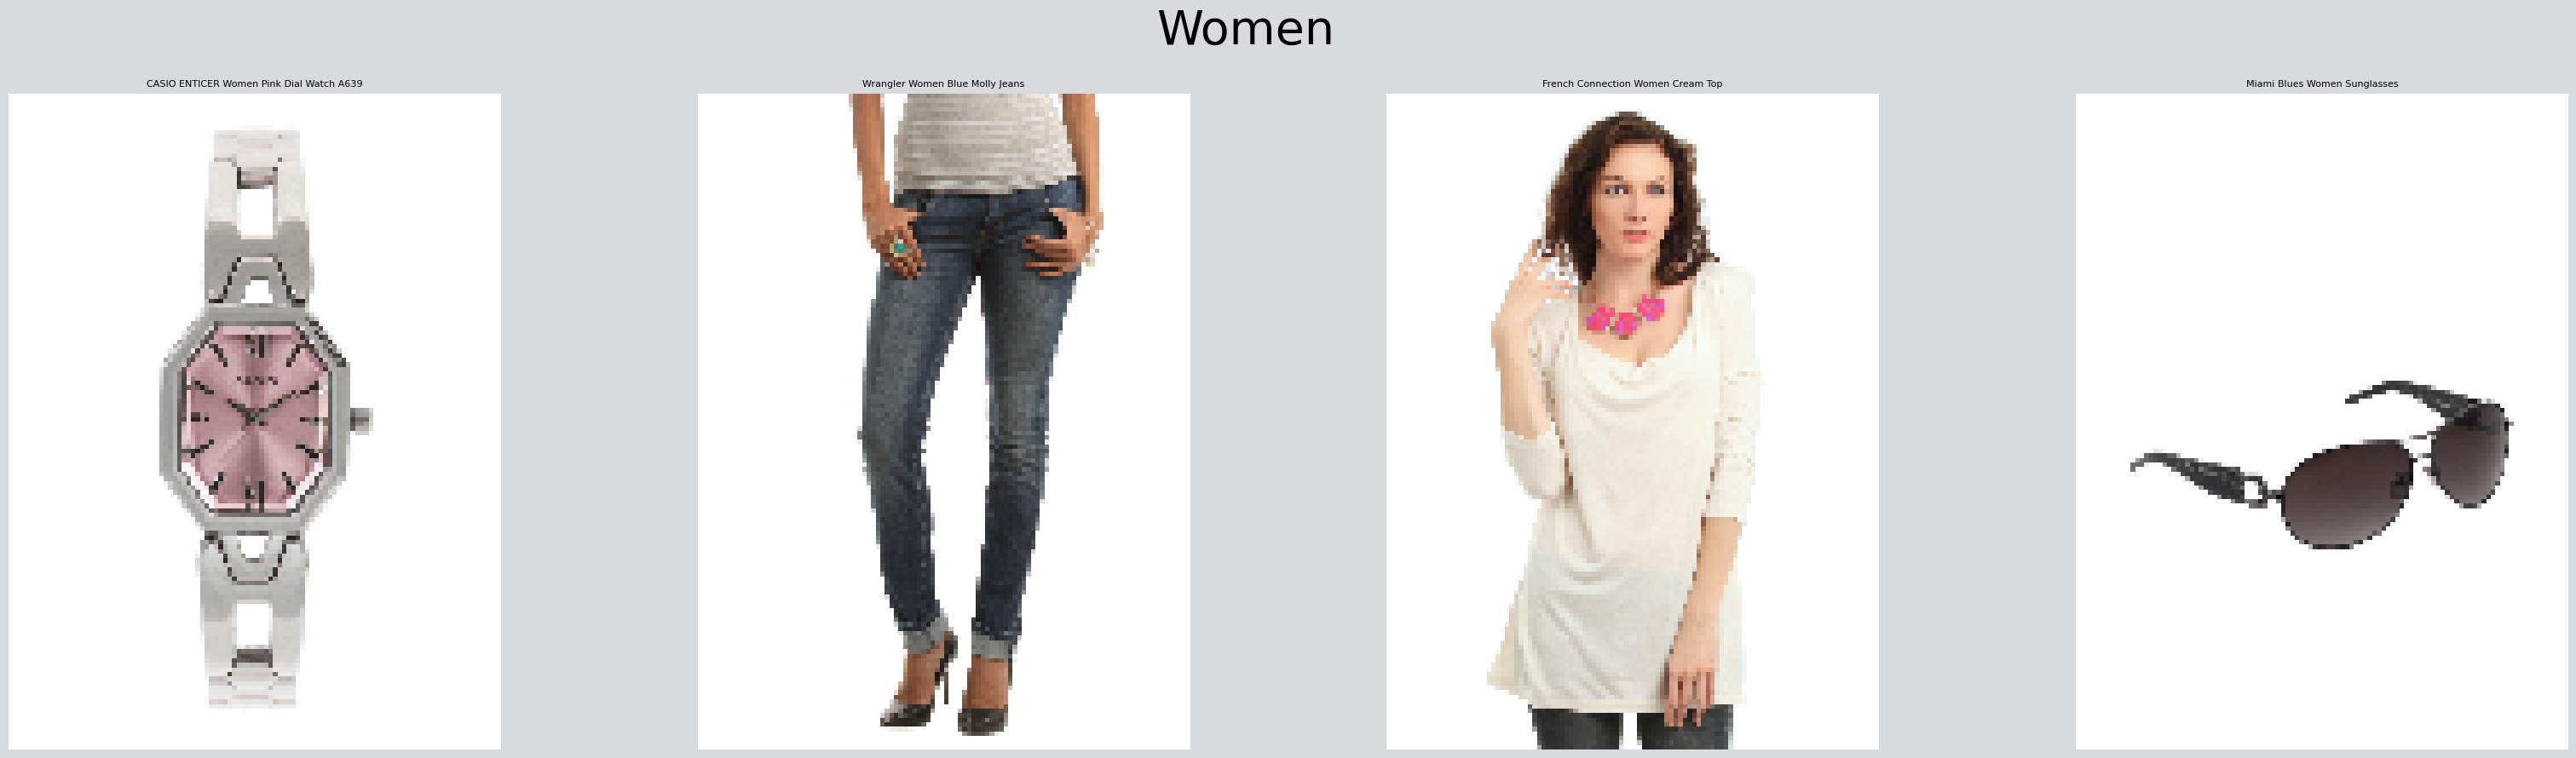

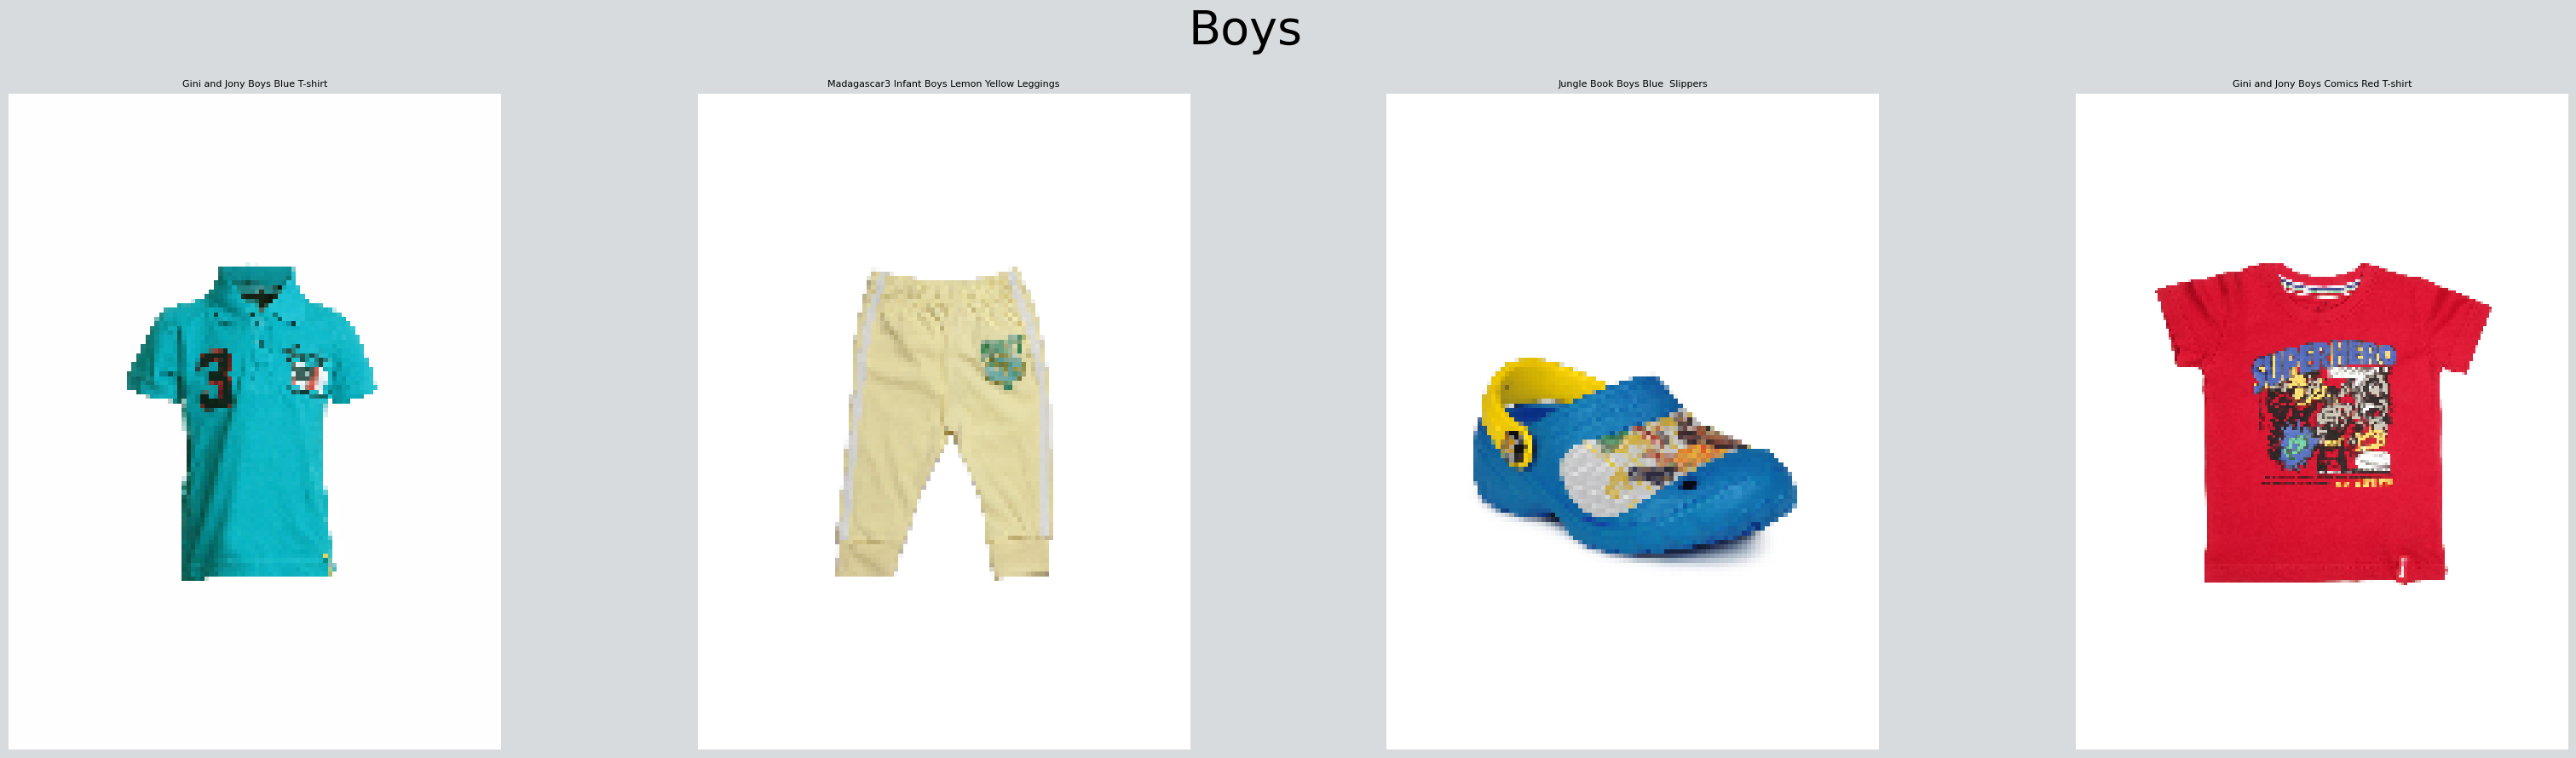

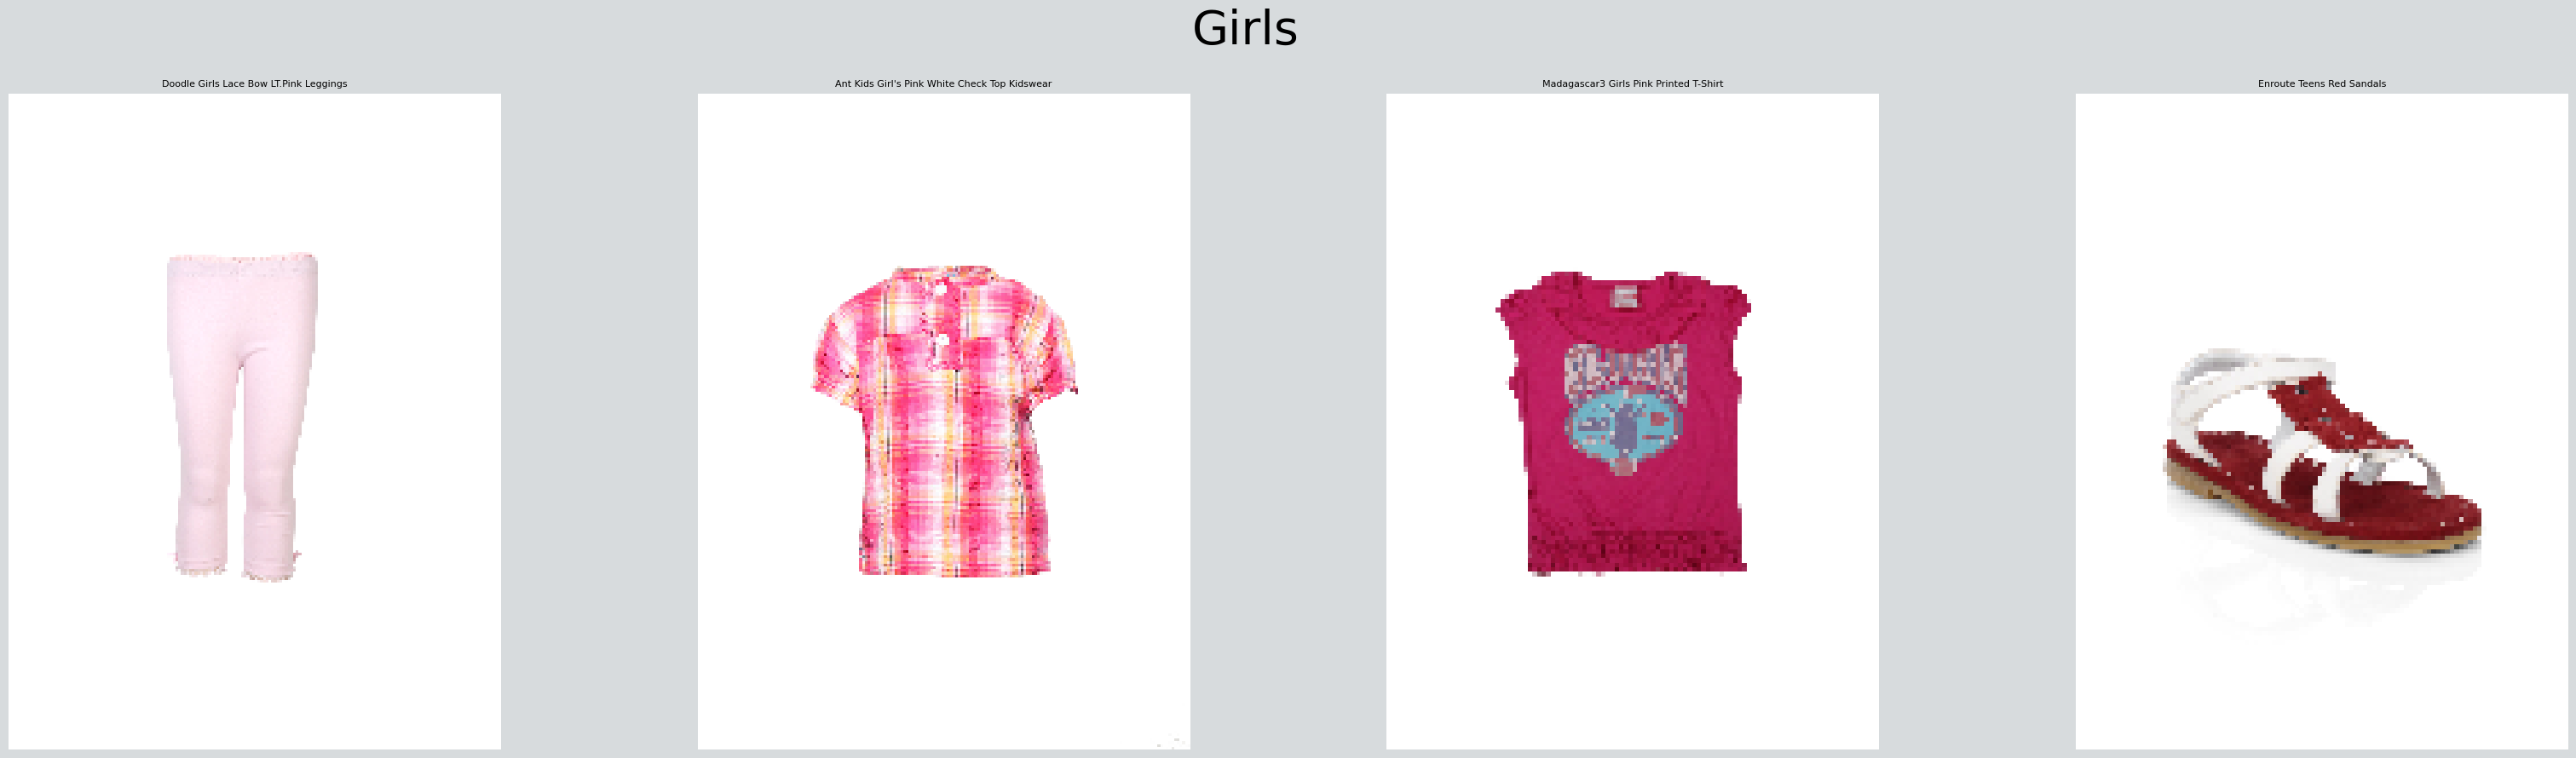

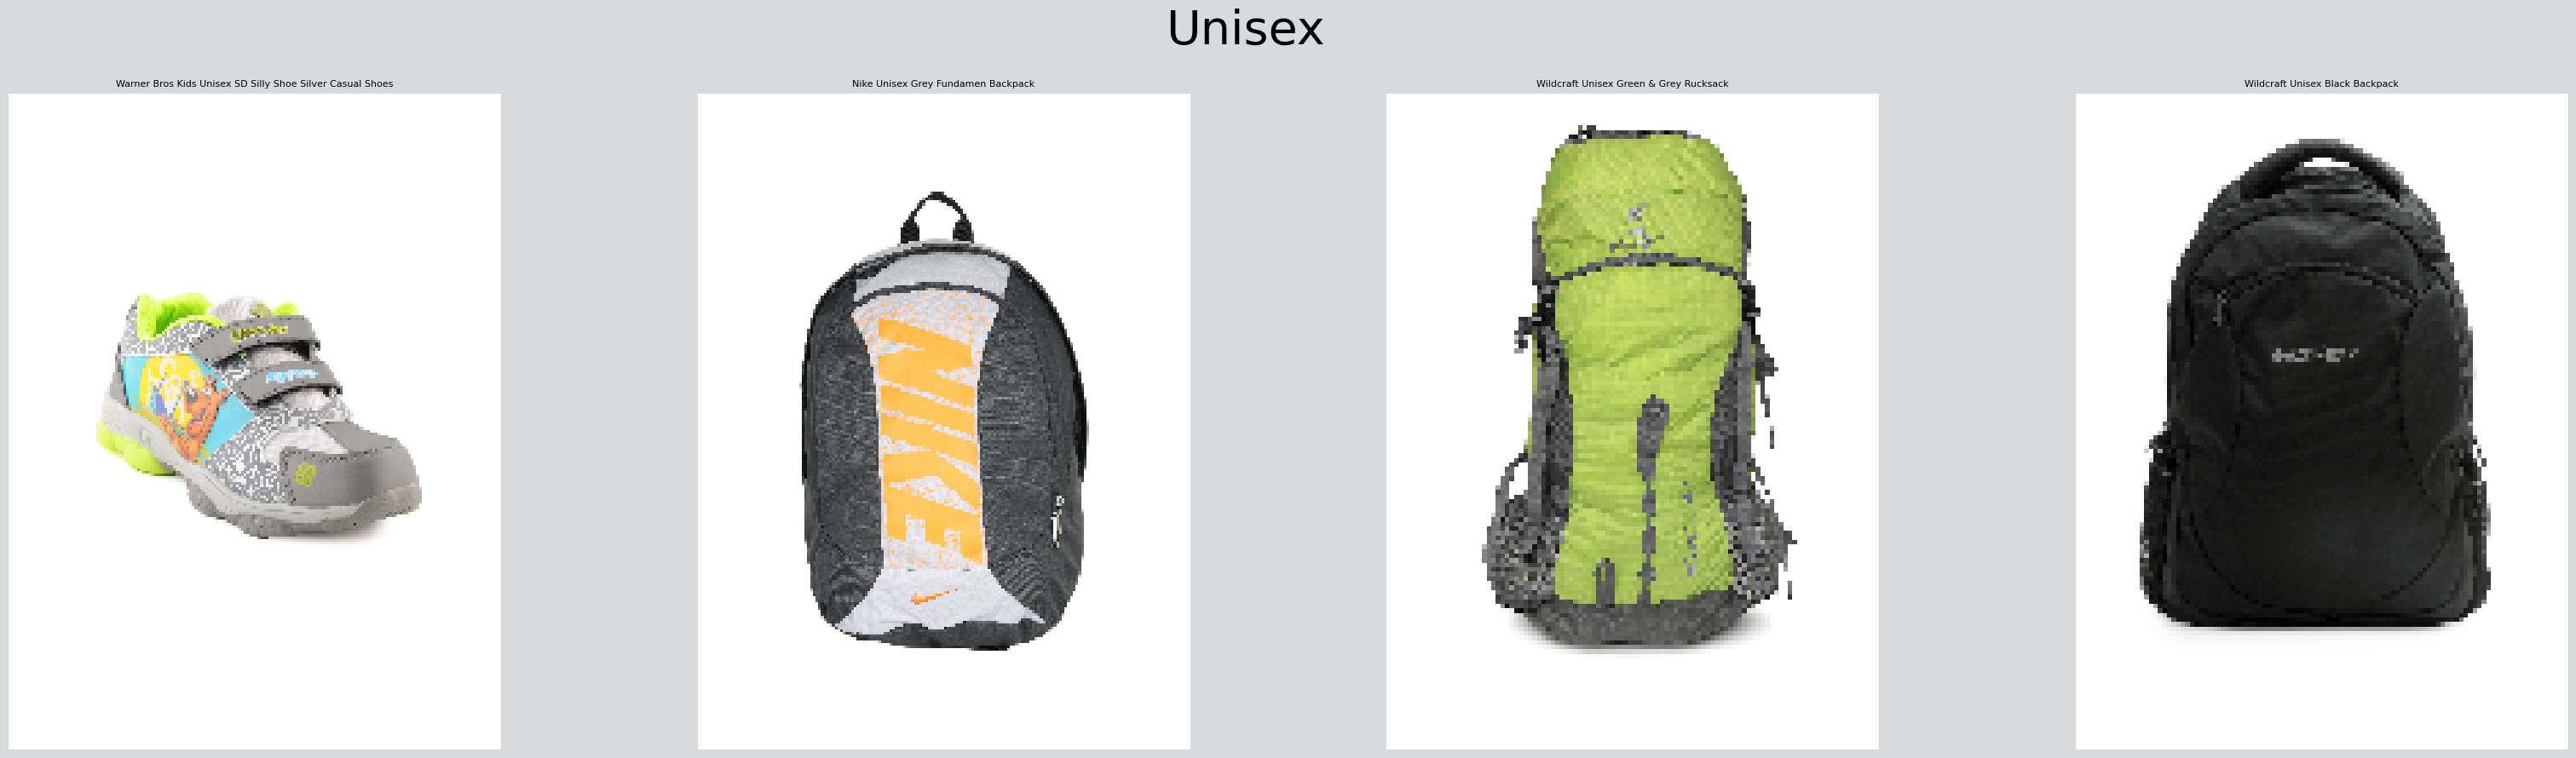

In [54]:
plot_grouped_images(styles_df, 'gender')

We have four images from each category of column gender.

## Data Preprocessing 

In [55]:
from keras.callbacks import ModelCheckpoint
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [56]:
def plot_loss_curves(history):
   
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [57]:
import tensorflow as tf
import datetime
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import ResNet50V2,EfficientNetB4

In [58]:
early_stopping = tf.keras.callbacks.EarlyStopping( monitor="val_loss",
    patience=5,
    mode="min",
)


In [59]:
train_datagen=ImageDataGenerator(rescale=1./255, validation_split = 0.3,)



In [60]:
BATCH_SIZE = 32

train_dataset = train_datagen.flow_from_dataframe(styles_df, 
                                                    x_col='image', 
                                                    y_col='articleType',
                                                    target_size=(224,224),
                                                    batch_size=BATCH_SIZE ,
                                                    subset = 'training',
                                                    class_mode='categorical')
val_dataset = train_datagen.flow_from_dataframe(styles_df,  
                                                x_col='image', 
                                                y_col='articleType',
                                                target_size=(224,224),
                                                batch_size=BATCH_SIZE ,
                                                subset = 'validation',
                                                class_mode='categorical')

Found 31094 validated image filenames belonging to 142 classes.


/opt/conda/lib/python3.7/site-packages/keras/preprocessing/image.py:1139: UserWarning:

Found 5 invalid image filename(s) in x_col="image". These filename(s) will be ignored.



Found 13325 validated image filenames belonging to 142 classes.


In [61]:
dic_type=train_dataset.class_indices
lis_type=list(dic_type.keys())

Residual Network (ResNet) is a Convolutional Neural Network (CNN) architecture that overcame the “vanishing gradient” problem, making it possible to construct networks with up to thousands of convolutional layers, which outperform shallower networks. Although ResNet has 3.8x more parameters and FLOPs than EfficeintNet with the same accuracy, the ResNet model requires 2.3x less memory and runs ~3x faster on TPUs and GPUs. We use ResNet50V2 model which has size 98MB, Top-1 accuracy is 76 percent and Top-5 accuracy is 93 percent on the ImageNet Dataset,25.6 million parameters,depth is 103 etc it is updated version of resnet50 model which gives higher accuracy. We also tried EfficientNetB4 on our dataset but that not work on our model and give validation accuarcy of 0.15 after running of 2 epochs.

In [62]:
num_classes=142
res = ResNet50V2(input_shape = (224,224,3), weights = 'imagenet', include_top = False)
for layer in res.layers:
     layer.trainable = False
x = Flatten()(res.output)
x = Dense(128, activation = 'relu')(x) 
x = Dense(64, activation = 'relu')(x) 
x = Dense(num_classes, activation = 'softmax')(x) 
model = Model(inputs = res.input, outputs = x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


94668760/94668760 [==============================] - 4s 0us/step


In [63]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
res_history = model.fit(train_dataset,
                                  epochs=10,
                                  steps_per_epoch=len(train_dataset),
                                  validation_data=val_dataset,
                                  validation_steps=len(val_dataset),
                                  callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="resnet50v2_model"),early_stopping]
                                 )

In [ ]:
num_classes=142
effi = EfficientNetB4(input_shape = (224,224,3), weights = 'imagenet', include_top = False)
for layer in effi.layers:
     layer.trainable = False
x = Flatten()(effi.output)
x = Dense(128, activation = 'relu')(x) 
x = Dense(64, activation = 'relu')(x) 
x = Dense(num_classes, activation = 'softmax')(x) 
model = Model(inputs = effi.input, outputs = x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
effi_history = model.fit(train_dataset,
                                  epochs=10,
                                  steps_per_epoch=len(train_dataset),
                                  validation_data=val_dataset,
                                  validation_steps=len(val_dataset),
                                  callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="efficientnetb4_model"),early_stopping]
                                 )

In [ ]:
plot_loss_curves(res_history)

In [ ]:
model.save_weights("model.h5")

In [ ]:
from IPython.display import FileLink
FileLink(r'model.h5')

In [ ]:
import pickle
filename= "trained_model_type.sav"
a=open(filename,'wb')
pickle.dump(model,a)
a.flush()
a.close()

In [ ]:
from IPython.display import FileLink
FileLink(r'trained_model_type.sav')

In [64]:
num_classes=142
res = ResNet50V2(input_shape = (224,224,3), weights = 'imagenet', include_top = False)
for layer in res.layers:
     layer.trainable = False
x = Flatten()(res.output)
x = Dense(128, activation = 'relu')(x) 
x = Dense(64, activation = 'relu')(x) 
x = Dense(num_classes, activation = 'softmax')(x) 
type_model = Model(inputs = res.input, outputs = x)
type_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Restore the weights
type_model.load_weights('/kaggle/input/screenshots-from-amazon/model.h5')


In [ ]:
type_model.evaluate(val_dataset)

## Gender prediction

In [65]:
train_datagen=ImageDataGenerator(rescale=1./255, validation_split = 0.3)

In [66]:
BATCH_SIZE = 32

train_dataset_gender = train_datagen.flow_from_dataframe(styles_df, 
                                                    x_col='image', 
                                                    y_col='gender',
                                                    target_size=(224,224),
                                                    batch_size=BATCH_SIZE ,
                                                    subset = 'training',
                                                    class_mode='categorical')
val_dataset_gender = train_datagen.flow_from_dataframe(styles_df,  
                                                x_col='image', 
                                                y_col='gender',
                                                target_size=(224,224),
                                                batch_size=BATCH_SIZE ,
                                                subset = 'validation',
                                                class_mode='categorical')

Found 31094 validated image filenames belonging to 5 classes.
Found 13325 validated image filenames belonging to 5 classes.


In [67]:
print(train_dataset_gender.class_indices)

{'Boys': 0, 'Girls': 1, 'Men': 2, 'Unisex': 3, 'Women': 4}


In [68]:
dic_gender=train_dataset_gender.class_indices
lis_gender=list(dic_gender.keys())

In [ ]:
num_classes=5
res = ResNet50V2(input_shape = (224,224,3), weights = 'imagenet', include_top = False)
for layer in res.layers:
     layer.trainable = False
x = Flatten()(res.output)
x = Dense(128, activation = 'relu')(x) 
x = Dense(64, activation = 'relu')(x) 
x = Dense(num_classes, activation = 'softmax')(x) 
model_gender = Model(inputs = res.input, outputs = x)
model_gender.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
res_history_gender = model_gender.fit(train_dataset_gender,
                                  epochs=10,
                                  steps_per_epoch=len(train_dataset_gender),
                                  validation_data=val_dataset_gender,
                                  validation_steps=len(val_dataset_gender),
                                  callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="resnet50v2_model_gender"),early_stopping]
                                 )

In [ ]:
plot_loss_curves(res_history_gender)

In [ ]:
model_gender.save_weights("model_gender.h5")

In [ ]:
from IPython.display import FileLink
FileLink(r'trained_model_gender.sav')

In [ ]:
import pickle
filename= "trained_model_gender.sav"
a=open(filename,'wb')
pickle.dump(model_gender,a)
a.flush()
a.close()

In [69]:
num_classes=5
res = ResNet50V2(input_shape = (224,224,3), weights = 'imagenet', include_top = False)
for layer in res.layers:
     layer.trainable = False
x = Flatten()(res.output)
x = Dense(128, activation = 'relu')(x) 
x = Dense(64, activation = 'relu')(x) 
x = Dense(num_classes, activation = 'softmax')(x) 
gender_model = Model(inputs = res.input, outputs = x)
gender_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Restore the weights
gender_model.load_weights('/kaggle/input/screenshots-from-amazon/model_gender.h5')

## Season Prediction

I regret not having trained the model for predicting the season and colour since it would have taken five hours to train one model and would have needed additional processing power. I thus had to put two models on wait because the deadline for turning in the assignment had arrived, but I would finish my training after turning in the assignment. Only two models are not trained, but the code functions correctly.

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, validation_split = 0.3)

In [ ]:
BATCH_SIZE = 32

train_dataset_season = train_datagen.flow_from_dataframe(styles_df, 
                                                    x_col='image', 
                                                    y_col='season',
                                                    target_size=(224,224),
                                                    batch_size=BATCH_SIZE ,
                                                    subset = 'training',
                                                    class_mode='categorical')
val_dataset_season = train_datagen.flow_from_dataframe(styles_df,  
                                                x_col='image', 
                                                y_col='season',
                                                target_size=(224,224),
                                                batch_size=BATCH_SIZE ,
                                                subset = 'validation',
                                                class_mode='categorical')

In [ ]:
dic_season=train_dataset_season.class_indices
lis_season=list(dic_season.keys())

In [ ]:
num_classes=4
res = ResNet50V2(input_shape = (224,224,3), weights = 'imagenet', include_top = False)
for layer in res.layers:
     layer.trainable = False
x = Flatten()(res.output)
x = Dense(128, activation = 'relu')(x) 
x = Dense(64, activation = 'relu')(x) 
x = Dense(num_classes, activation = 'softmax')(x) 
model_season = Model(inputs = res.input, outputs = x)
model_season.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
res_history_season = model_season.fit(train_dataset_season,
                                  epochs=10,
                                  steps_per_epoch=len(train_dataset_season),
                                  validation_data=val_dataset_season,
                                  validation_steps=len(val_dataset_season),
                                  callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="resnet50v2_model_season"),early_stopping]
                                 )

In [ ]:
plot_loss_curves(res_history_season)

In [ ]:
model_gender.save_weights("model_season.h5")

In [ ]:
from IPython.display import FileLink
FileLink(r'model_season.h5')

In [ ]:
import pickle
filename= "trained_model_season.sav"
a=open(filename,'wb')
pickle.dump(model_season,a)
a.flush()
a.close()

## Colour Prediction

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, validation_split = 0.3)

In [ ]:
BATCH_SIZE = 32

train_dataset_colour = train_datagen.flow_from_dataframe(styles_df, 
                                                    x_col='image', 
                                                    y_col='baseColour',
                                                    target_size=(224,224),
                                                    batch_size=BATCH_SIZE ,
                                                    subset = 'training',
                                                    class_mode='categorical')
val_dataset_colour = train_datagen.flow_from_dataframe(styles_df,  
                                                x_col='image', 
                                                y_col='baseColour',
                                                target_size=(224,224),
                                                batch_size=BATCH_SIZE ,
                                                subset = 'validation',
                                                class_mode='categorical')

In [ ]:
dic_colour=train_dataset_colour.class_indices
lis_colour=list(dic_colour.keys())

In [ ]:
num_classes=
res = ResNet50V2(input_shape = (224,224,3), weights = 'imagenet', include_top = False)
for layer in res.layers:
     layer.trainable = False
x = Flatten()(res.output)
x = Dense(128, activation = 'relu')(x) 
x = Dense(64, activation = 'relu')(x) 
x = Dense(num_classes, activation = 'softmax')(x) 
model_colour = Model(inputs = res.input, outputs = x)
model_colour.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
res_history_colour = model_colour.fit(train_dataset_colour,
                                  epochs=10,
                                  steps_per_epoch=len(train_dataset_colour),
                                  validation_data=val_dataset_colour,
                                  validation_steps=len(val_dataset_colour),
                                  callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="resnet50v2_model_colour"),early_stopping]
                                 )

In [ ]:
plot_loss_curves(res_history_colour)

In [ ]:
model_gender.save_weights("model_colour.h5")

In [ ]:
from IPython.display import FileLink
FLink(r'model_colour.h5')

In [ ]:
import pickle
filename= "trained_model_colour.sav"
a=open(filename,'wb')
pickle.dump(model_colour,a)
a.flush()
a.close()

## Testing some images taken from amazon

In [70]:
def load_and_prep_image(filename, img_shape=224):
  
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

In [71]:
def pred_and_plot(model, filename,class_names):
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]
# Plot the image and predicted value
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 5s 5s/step


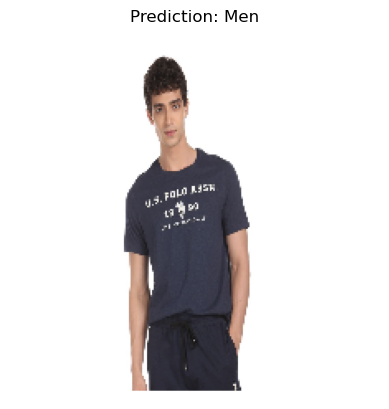

In [72]:
filename='/kaggle/input/screenshots-from-amazon/Screenshot 2023-04-17 at 11.18.31 AM.png'
pred_and_plot(gender_model, filename,lis_gender)

1/1 [==============================] - 1s 805ms/step


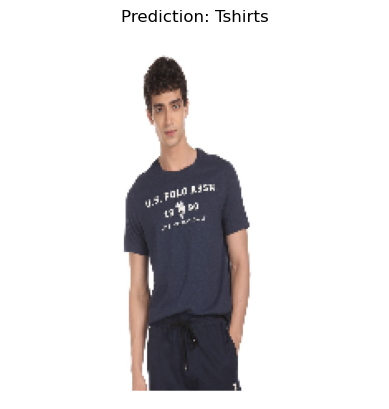

In [73]:
pred_and_plot(type_model,filename,lis_type)

1/1 [==============================] - 0s 26ms/step


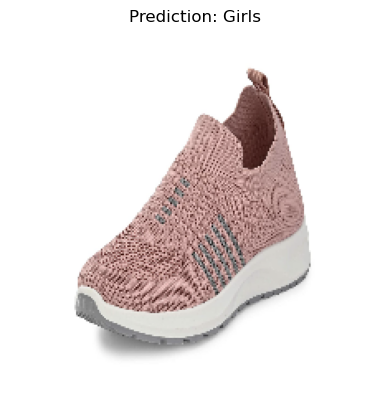

In [74]:
filename_2='/kaggle/input/screenshots-from-amazon/Screenshot 2023-04-17 at 11.18.59 AM.png'
pred_and_plot(gender_model, filename_2,lis_gender)

1/1 [==============================] - 0s 26ms/step


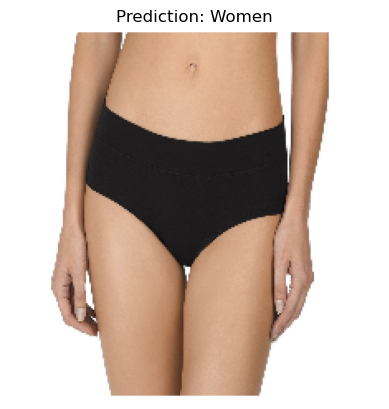

In [75]:
filename_3='/kaggle/input/screenshots-from-amazon/Screenshot 2023-04-17 at 11.26.20 AM.png'
pred_and_plot(gender_model, filename_3,lis_gender)

1/1 [==============================] - 0s 25ms/step


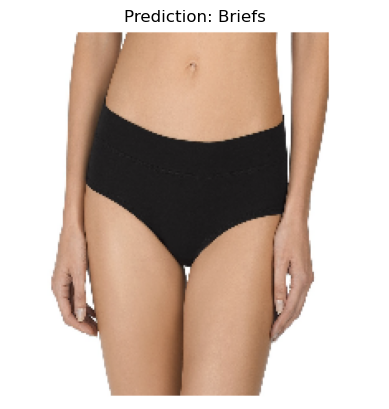

In [76]:
pred_and_plot(type_model,filename_3,lis_type)

1/1 [==============================] - 0s 26ms/step


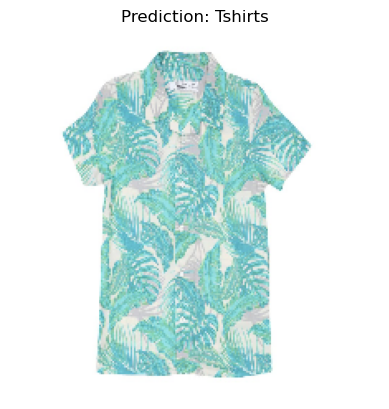

In [77]:
filename_4='/kaggle/input/screenshots-from-amazon/Screenshot 2023-04-17 at 11.28.20 AM.png'
pred_and_plot(type_model,filename_4,lis_type)

1/1 [==============================] - 0s 25ms/step


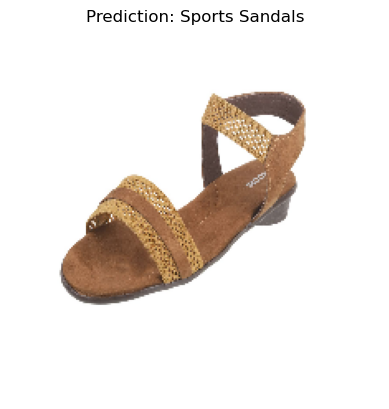

In [78]:
filename_5='/kaggle/input/screenshots-from-amazon/Screenshot 2023-04-17 at 11.29.23 AM.png'
pred_and_plot(type_model,filename_5,lis_type)

1/1 [==============================] - 0s 26ms/step


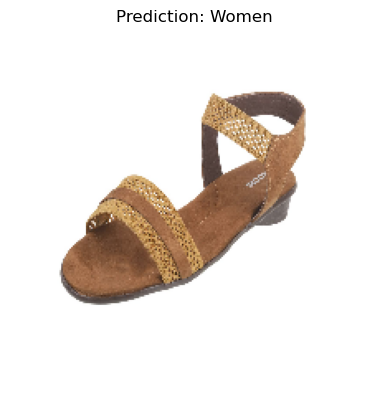

In [79]:
pred_and_plot(gender_model, filename_5,lis_gender)